# Stroke Prediction with Naive Bayes Classifier

### Developed by:
> Cicilia Widhi Astuti
>> 20/456362/TK/50492

> Hafizha Ulinnuha Ahmad 
>> 20/456365/TK/50495

> Michael Hamonangan Sitorus 
>>20/460552/TK/51141

> Azzahra Adine Divania 
>>20/463595/TK/51587

## Importing libraries/dependencies

In [301]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import math 
import random 
import csv 

## Data Preprocessing and Explanatory Data Analysis

In [302]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [303]:
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Class Distribution - Pie Plot

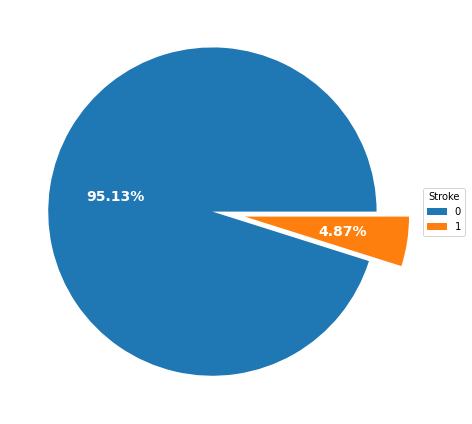

In [304]:
pie_data = data['stroke'].value_counts(normalize=True).values * 100
pie_label = data['stroke'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, startangle=0, explode=[0, 0.2],
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='Stroke',
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

The class distribution seems imbalanced. We will do oversampling technique to size up the positive stroke records.

### Resolve Unbalanced Data using Oversampling Technique

In [305]:
# Count class
class_count_0, class_count_1 = data['stroke'].value_counts()

# Separate class
class_0 = data[data['stroke'] == 0]
class_1 = data[data['stroke'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4861, 11)
class 1: (249, 11)


total class of 1 and 0: 1    4861
0    4861
Name: stroke, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

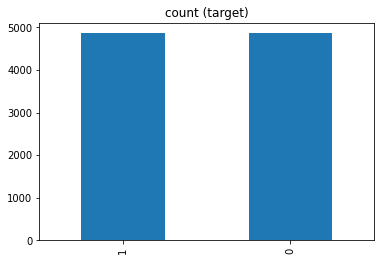

In [306]:
# Random Over-Sampling
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)
data = test_over

print("total class of 1 and 0:", data['stroke'].value_counts())
data['stroke'].value_counts().plot(kind='bar', title='count (target)')

### Data Cleaning

In [307]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  949
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:xlabel='bmi'>

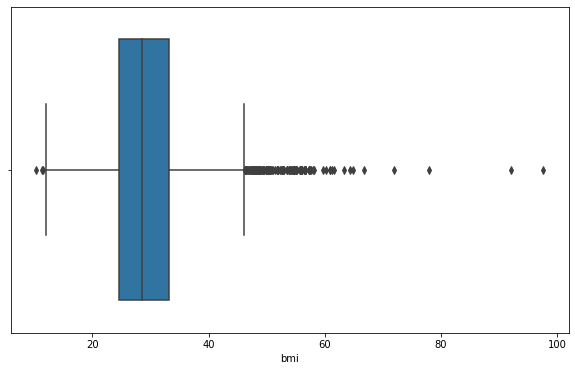

In [308]:
fig = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data, x='bmi')

In [309]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

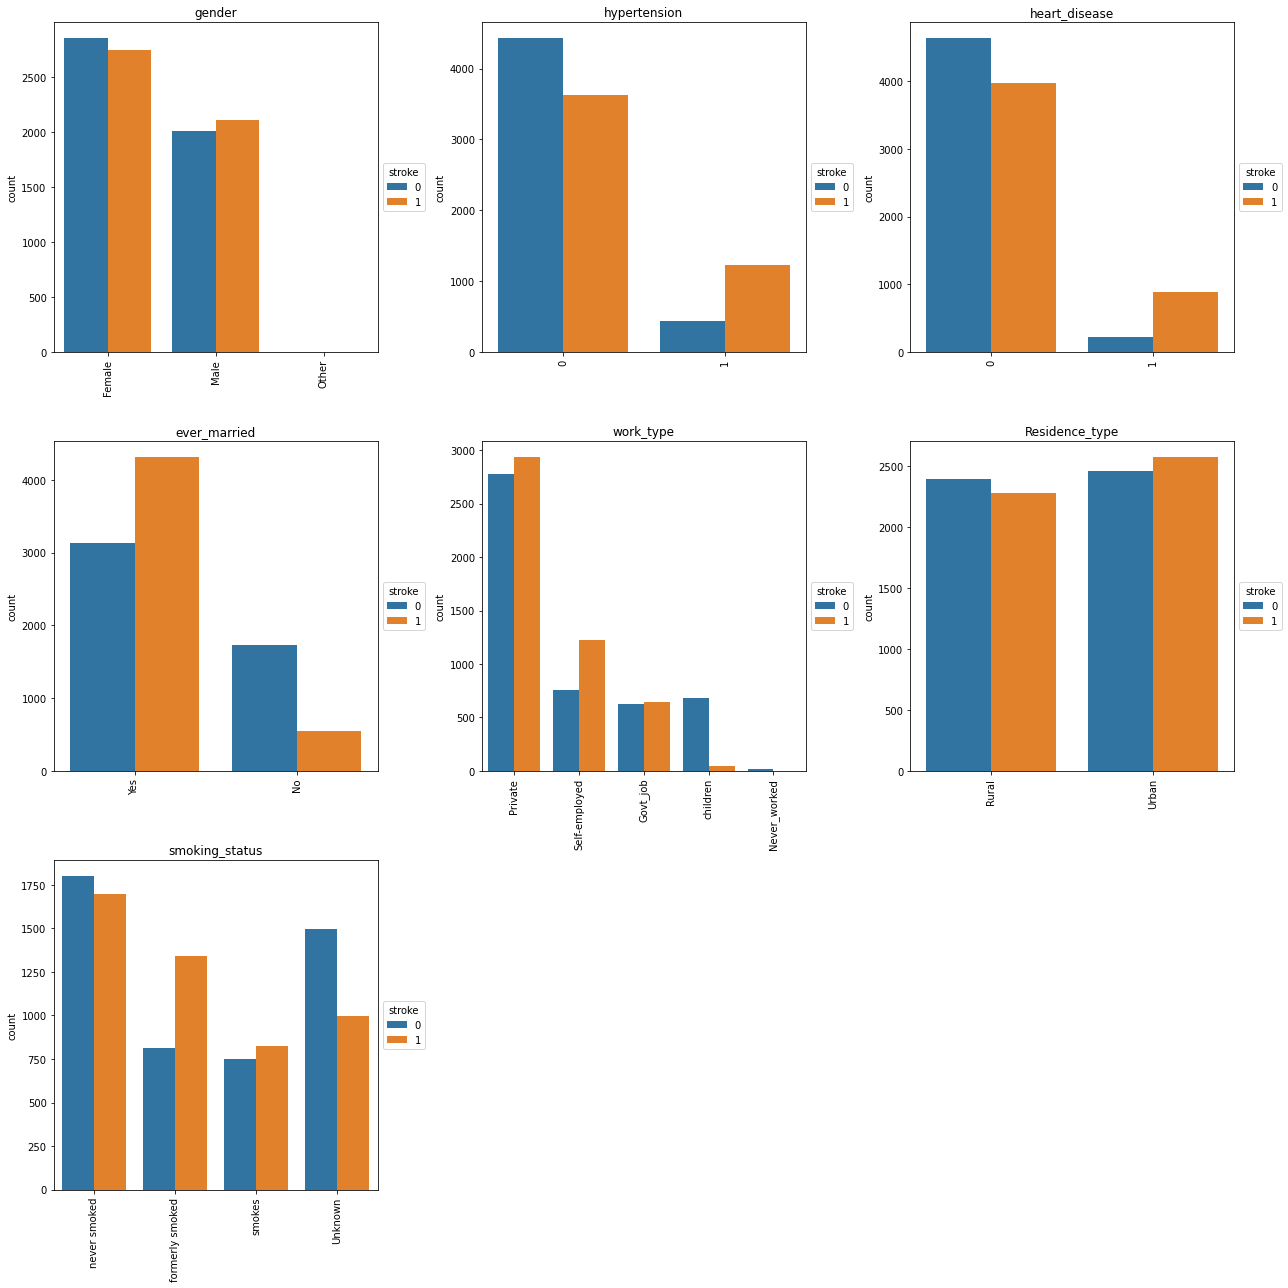

In [310]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'Residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  
axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()


In [311]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
113,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
55,Male,63.0,0,1,Yes,Private,Rural,196.71,36.5,formerly smoked,1
123,Male,56.0,1,0,Yes,Private,Rural,249.31,35.8,never smoked,1
141,Female,59.0,0,0,Yes,Private,Rural,116.44,23.8,smokes,1
42,Male,82.0,0,1,Yes,Private,Urban,144.90,26.4,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.6,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Numerical Data Distribution : Box Plot

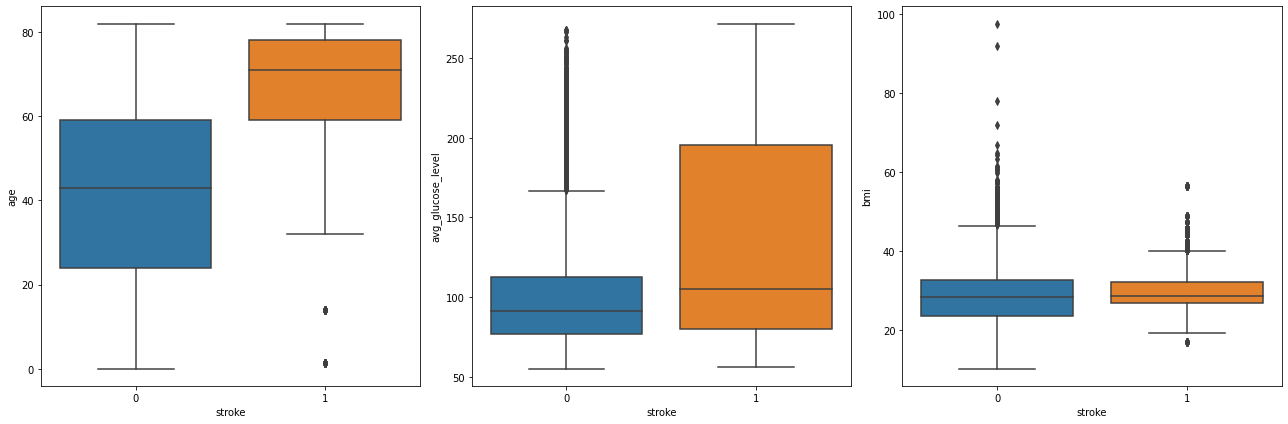

In [312]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.boxplot(data=data, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()


### Heatmap Correlation

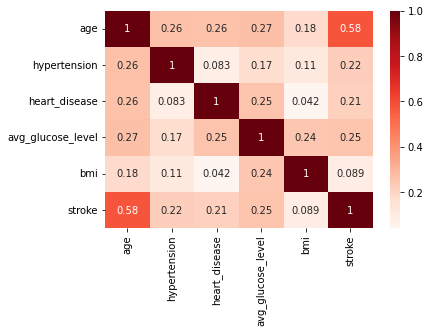

In [313]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data.corr(), annot=True, cmap = 'Reds')
plt.show()

### Choosing Attributes of Interest

In [314]:
poi = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
data = data[poi]
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
113,45.0,0,0,224.10,56.6,1
55,63.0,0,1,196.71,36.5,1
123,56.0,1,0,249.31,35.8,1
141,59.0,0,0,116.44,23.8,1
42,82.0,0,1,144.90,26.4,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 113 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9722 non-null   float64
 1   hypertension       9722 non-null   int64  
 2   heart_disease      9722 non-null   int64  
 3   avg_glucose_level  9722 non-null   float64
 4   bmi                9722 non-null   float64
 5   stroke             9722 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 531.7 KB


In [316]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

data[column_numerical].describe()

,age,avg_glucose_level,bmi
count,9722.000000,9722.000000,9722.000000
mean,54.802000,118.489667,29.430014
std,22.306488,55.175464,6.884761
min,0.080000,55.120000,10.300000
25%,41.000000,78.245000,25.300000
50%,59.000000,96.940000,28.600000
75%,74.000000,144.900000,32.600000
max,82.000000,271.740000,97.600000


In [317]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
113,45.0,0,0,224.10,56.6,1
55,63.0,0,1,196.71,36.5,1
123,56.0,1,0,249.31,35.8,1
141,59.0,0,0,116.44,23.8,1
42,82.0,0,1,144.90,26.4,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


### Outputing the preprocessed dataset

In [318]:
data.to_csv('preprocessed_stroke_data.csv', index=False)

## Modelling : Naive Bayes Classifier

In [319]:
def loadCsv(filename):
    lines = csv.reader(open(filename))
    dataset = list(lines)
    dataset.pop(0)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [320]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [321]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if vector[-1] not in separated:
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [322]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg, 2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [323]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [324]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [325]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-math.pow(x-mean, 2)/(2*math.pow(stdev, 2)))
    return exponent/(math.sqrt(2*math.pi)*stdev)

In [326]:
def calculateClassProbabilites(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [327]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilites(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [328]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [339]:

def getConfusionMatrix(testSet, predictions):
    mat = np.zeros((2,2))
    for i in range(len(testSet)):
        # True Positive
        if testSet[i][-1] == predictions[i] and int(predictions[i]) == 1:
            mat[0, 0] += 1
        # True Negative
        elif testSet[i][-1] == predictions[i] and int(predictions[i]) == 0:
            mat[1, 1] += 1
        # False Positive
        elif testSet[i][-1] != predictions[i] and int(predictions[i]) == 1:
            mat[0, 1] += 1
        # False Negative
        elif testSet[i][-1] != predictions[i] and int(predictions[i]) == 0:
            mat[1, 0] += 1
            
    # Confusion Matrix Plotting
    group_names = ['True Pos','False Pos','False Neg','True Neg']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    mat.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        mat.flatten()/np.sum(mat)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(mat, annot=labels, fmt='')
    
    TP = mat[0, 0]
    TN = mat[1, 1]
    FP = mat[0, 1]
    FN = mat[1, 0]
    
    print("\nOUTPUT ANALYSIS")
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    print("Accuracy:", accuracy)
    
    precision = TP/(TP+FP)
    print("Precision:", precision)
    
    recall = TP/(TP+FN)
    print("Recall:", recall)
    
    specificity = TN/(TN+FP)
    print("Specificity:", specificity)
    
    negative_pred_value = TN/(FN+TN)
    print("Negative Predicted Value:",  negative_pred_value)
    
    f1_score = 2*(recall*precision)/(recall+precision)
    print("F1 Score:", f1_score)
    
    print('\n')
    
    return mat

Split 9722 rows into train = 6513 and test = 3209 rows

OUTPUT ANALYSIS
Accuracy: 0.7151760673106887
Precision: 0.7577487765089723
Recall: 0.6009055627425615
Specificity: 0.8214070956103428
Negative Predicted Value: 0.6888552697932425
F1 Score: 0.6702741702741704




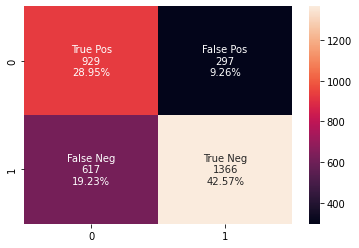

In [340]:
filename = 'preprocessed_stroke_data.csv'
splitRatio = 0.67
dataset = loadCsv(filename)
trainingSet, testSet = splitDataset(dataset, splitRatio)
print('Split {0} rows into train = {1} and test = {2} rows'.format(len(dataset), len(trainingSet), len(testSet)))
summaries = summarizeByClass(trainingSet)
predictions = getPredictions(summaries, testSet)
confusion_matrix = getConfusionMatrix(testSet, predictions)

<p align="center"><em>--- end of the notebook ---</em></p>